# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)  # 500 valori uniformemente distribuiti in [-1,1]
x_valid = np.random.uniform(-1, 1, 50)   # 50 valori uniformemente distribuiti in [-1,1]
x_valid.sort()  # Ordinamento crescente dei valori x_valid
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

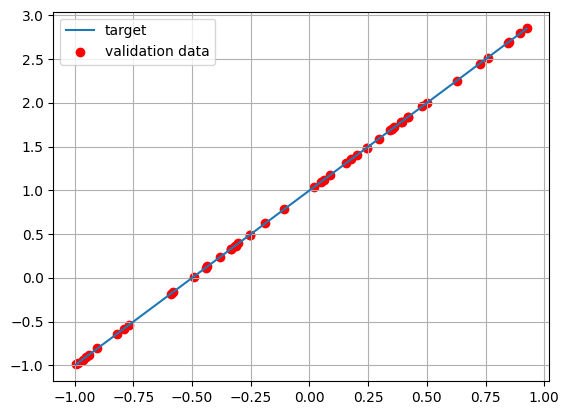

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

# In blu si ha la funzione che si vuole fittare, mentre i punti rossi sono i punti (x,y) del validation set
# Tali punti sono disposti esattamente sulla funzione, poichè si sta considerando nullo il rumore

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Sequential è il modello di rete neurale sequenziale, composto dallo strato Dense
# 'Dense(1, input_shape=(1,))'' vuol dire che il singolo strato ha un singolo neurone,
# mentre input_shape=(1,) specifica che il modello accetta un singolo valore di input
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# Con questo comando si compila il modello appena definito
# L'ottimizzatore è lo stocastic gradient descend ('sgd')
# La funzione loss da minimizzare è la mean squared error ('mse')
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# fit è la funzione che esegue l'addestramento su (x_train, y_train)
# batch_size indica il numero di campioni d'addestramento
# epochs sono il numero di volte in cui l'intero dataset di addestramento viene utilizzato per addestrare il modello
# shuffle=True specifica che i dati di addestramento vengono mescolati casualmente prima di ogni epoca
# specifica i dati di validazione da utilizzare durante l'addestramento per monitorare le metriche di valutazione

Epoch 1/30
16/16 [==============================] - 1s 32ms/step - loss: 2.2789 - mse: 2.2789 - val_loss: 1.6639 - val_mse: 1.6639
Epoch 2/30
16/16 [==============================] - 0s 9ms/step - loss: 1.6305 - mse: 1.6305 - val_loss: 1.2163 - val_mse: 1.2163
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 1.2045 - mse: 1.2045 - val_loss: 0.9178 - val_mse: 0.9178
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 0.9132 - mse: 0.9132 - val_loss: 0.7066 - val_mse: 0.7066
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.7038 - mse: 0.7038 - val_loss: 0.5538 - val_mse: 0.5538
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.4384 - val_mse: 0.4384
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4351 - mse: 0.4351 - val_loss: 0.3491 - val_mse: 0.3491
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.3455 - mse: 0.3

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# Questo comando restituisce i pesi e i bias
# In questo caso c'è un singolo peso (coefficiente angolare) e un singolo bias (intercetta)
# Dato che si ha un solo neurone
model.get_weights()

[array([[1.9149448]], dtype=float32), array([0.9990443], dtype=float32)]

In [8]:
# evaluate model
# La funzione evaluate viene chiamata sul modello per calcolare le metriche di valutazione del modello utilizzando
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# score[0] rappresenta la perdita (loss) ottenuta dal modello sui dati di validazione
# score[1] rappresenta l'accuratezza (accuracy) del modello sui dati di validazione

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023

Test loss: 0.0023001262452453375
Test accuracy: 0.0023001262452453375


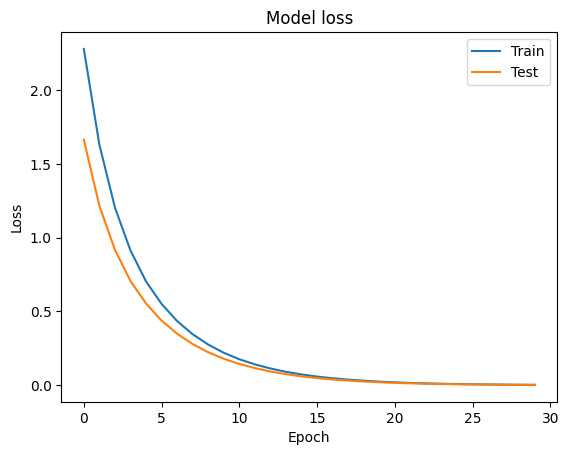

In [9]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Queste righe di codice sono utilizzate per visualizzare graficamente la storia dell'addestramento del modello
# Sono inclusi i valori di loss (perdita) durante le epoche di addestramento e di validazione

4/4 [==============================] - 0s 8ms/step


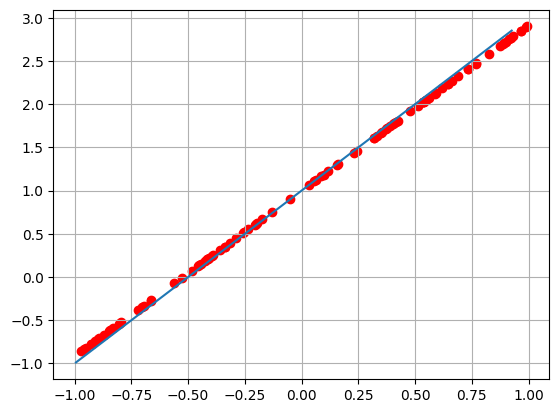

In [10]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# La funzione predict viene chiamata sul modello per ottenere le previsioni corrispondenti ai valori di x_predicted
# Le previsioni risultanti vengono assegnate all'array y_predicted.

---

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

---

Si considera la rete neurale costruita precedentemente, ovvero costituita da un singolo neurone, per cui l'analisi consiste nel variare i parametri che la costituiscono.

Prima di tutto si studia il caso in cui si hanno meno valori di train e meno epoche, considerando ancora nullo il rumore statistico sui suddetti dati, dopodichè si aumenta il numero delle epoche (tenendo fissi il training set e il validation set) e il numero dei dati di training e di validation (tenendo fisse le epoche), per poi infine introdurre il rumore statistico.

---

### $N_{\mathrm{train}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{epochs}}=30\,,\,\,\sigma=0$.

In [11]:
# Genero i valori di training e di validation senza rumore statistico
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

In [12]:
# Definisco il modello di rete neurale sequenziale e lo addestro passandogli il training set, il validation set
# e il numero di epoche necessarie
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4007728695869446
Test accuracy: 0.4007728695869446


Già dai valori di Test loss e Test accuracy, che indicano quanto bene il modello si adatta ai dati di addestramento durante il processo di apprendimento, mostrano che il modello utilizzato in questo caso è poco efficiente.

In [13]:
pesi = model.get_weights()

print('Coefficiente angolare stimato: ', pesi[0])
print('Intercetta stimata: ', pesi[1])

Coefficiente angolare stimato:  [[0.9522473]]
Intercetta stimata:  [0.83150566]


4/4 [==============================] - 0s 3ms/step


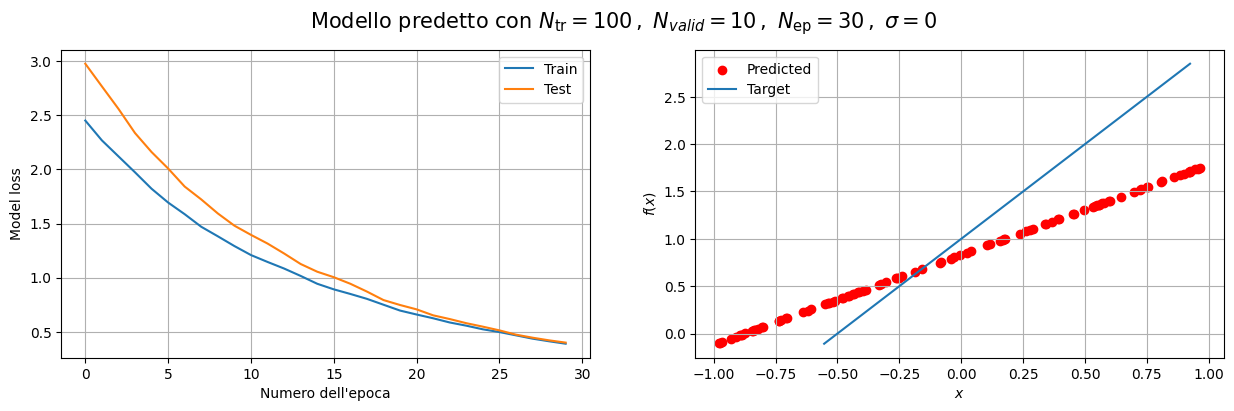

In [14]:
# Mostro il grafico dei valori della loss function durante l'addestramento e del fit finale
# e del confronto fra la funzione da fittare e i dati predetti dal modello utilizzato
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{\mathrm{tr}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{ep}}=30\,,\,\,\sigma=0$',fontsize=15)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Numero dell\'epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

Si osserva come il Model loss, sia per il training set che per il validation set, scende molto meno rapidamente nel caso in cui diminuiscono il numero di epoche e dei dati di test. Si nota inoltre come sia il coefficiente angolare che l'intercetta siano sottostimati (il caso del coefficiente angolare è più eclatante).

---

### $N_{\mathrm{train}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{epochs}}=100\,,\,\,\sigma=0$

In [15]:
# Genero i valori di training e di validation senza rumore statistico
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

In [16]:
# Definisco il modello di rete neurale sequenziale e lo addestro passandogli il training set, il validation set
# e il numero di epoche necessarie
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022877996787428856
Test accuracy: 0.022877996787428856


Si nota come aumentando il numero delle epoche di addestramento, i Test loss e Test accurancy diminuiscono sensibilmente: questo indica che il modello è sensibilmente migliorato.

In [17]:
pesi = model.get_weights()

print('Coefficiente angolare stimato: ', pesi[0])
print('Intercetta stimata: ', pesi[1])

Coefficiente angolare stimato:  [[1.730467]]
Intercetta stimata:  [0.98099583]


4/4 [==============================] - 0s 4ms/step


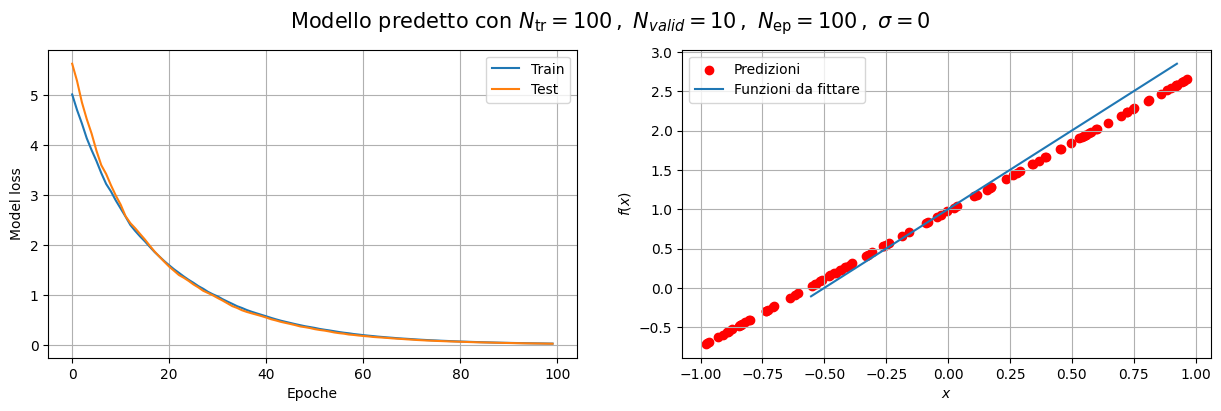

In [18]:
# Mostro il grafico dei valori della loss function durante l'addestramento e del fit finale
# e del confronto fra la funzione da fittare e i dati predetti dal modello utilizzato
plt.figure(figsize=(15,4))
plt.suptitle('Modello predetto con $N_{\mathrm{tr}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{ep}}=100\,,\,\,\sigma=0$',fontsize=15)

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Epoche')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizioni')
plt.plot(x_valid, y_target, label='Funzioni da fittare')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

plt.show()

Si osserva come in questo caso, aumentando il numero di epoche di addestramento, il coefficiente angolare e l'intercetta vengono stimati in modo più preciso. Inoltre si osserva come il model loss decresce in modo molto più veloce rispetto al caso precedente.

---

### $N_{\mathrm{train}}=500\,,\,\,N_{valid}=100\,,\,\,N_{\mathrm{epochs}}=30\,,\,\,\sigma=0$

In [19]:
# Genero i valori di training e di validation senza rumore statistico
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0 
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

In [20]:
# Definisco il modello di rete neurale sequenziale e lo addestro passandogli il training set, il validation set
# e il numero di epoche necessarie
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0009963199263438582
Test accuracy: 0.0009963199263438582


In questo caso si osserva un modello ancora migliore, visto che il model loss diminuisce ancora.

In [21]:
pesi = model.get_weights()

print('Coefficiente angolare stimato: ', pesi[0])
print('Intercetta stimata: ', pesi[1])

Coefficiente angolare stimato:  [[1.947637]]
Intercetta stimata:  [0.9993034]


4/4 [==============================] - 0s 6ms/step


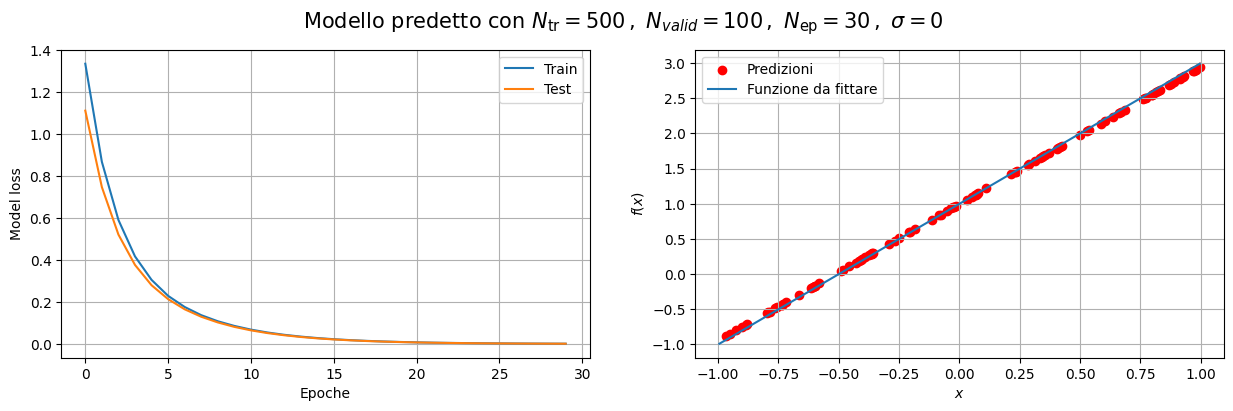

In [22]:
# Mostro il grafico dei valori della loss function durante l'addestramento e del fit finale
# e del confronto fra la funzione da fittare e i dati predetti dal modello utilizzato
plt.figure(figsize=(15,4))
plt.suptitle('Modello predetto con $N_{\mathrm{tr}}=500\,,\,\,N_{valid}=100\,,\,\,N_{\mathrm{ep}}=30\,,\,\,\sigma=0$',fontsize=15)

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Epoche')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizioni')
plt.plot(x_valid, y_target, label='Funzione da fittare')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

plt.show()

Si osserva come la loss function decresce praticamente allo stesso modo del caso precedente, ma la loss di validation decresce in modo più rapido. Inoltre si osserva come il coefficiente angolare e l'intercetta sono stimati con ancor più accuratezza.

---

### $N_{\mathrm{train}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{epochs}}=100\,,\,\,\sigma=0.2$

In [23]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.1
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

In [24]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,verbose=0,shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('     Test loss:', score[0])
print('     Test accuracy:', score[1])

     Test loss: 0.009594210423529148
     Test accuracy: 0.009594210423529148


Si nota come nel caso in cui si aggiunga il rumore statistico, i valori di loss sono addirittura più bassi di quelli nel caso in cui non si ha rumore.

In [25]:
pesi = model.get_weights()

print('Coefficiente angolare stimato: ', pesi[0])
print('Intercetta stimata: ', pesi[1])

Coefficiente angolare stimato:  [[1.8221797]]
Intercetta stimata:  [0.9921188]


4/4 [==============================] - 0s 5ms/step


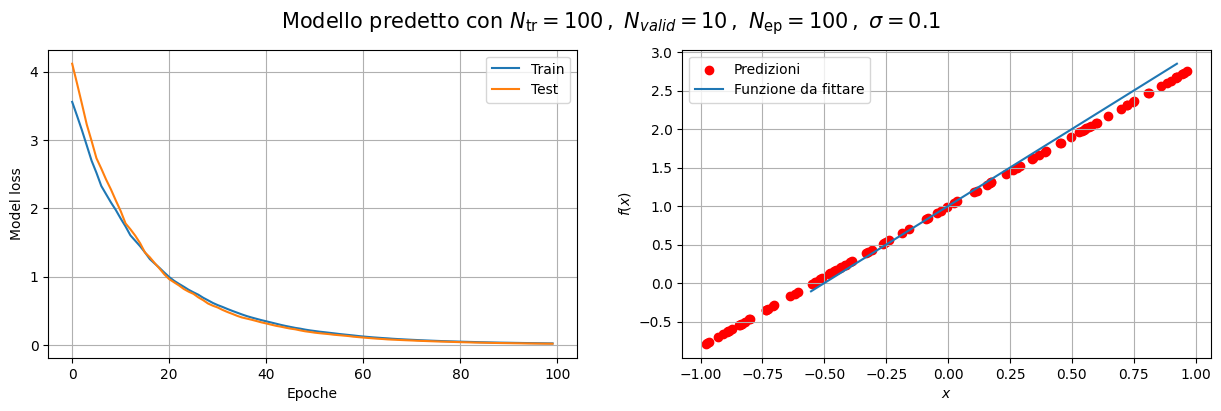

In [26]:
# Mostro il grafico dei valori della loss function durante l'addestramento e del fit finale
# e del confronto fra la funzione da fittare e i dati predetti dal modello utilizzato
plt.figure(figsize=(15,4))
plt.suptitle('Modello predetto con $N_{\mathrm{tr}}=100\,,\,\,N_{valid}=10\,,\,\,N_{\mathrm{ep}}=100\,,\,\,\sigma=0.1$',fontsize=15)

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Epoche')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizioni')
plt.plot(x_valid, y_target, label='Funzione da fittare')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

plt.show()

Si nota come nel caso in cui si introduca un rumore statistico, il coefficiente angolare e l'intercetta sono stimate in modo ancora più preciso rispetto al caso in cui $\sigma=0$. Dunque il modello migliora quando i dati del training set e del validation set sono soggetti ad un piccolo rumore statistico.

---

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

---

Nel caso in cui si voglia fittare un polinomio di terzo grado si deve utilizzare una rete neurale con più strati nascosti e un numero maggiore di neuroni. L'aggiunta di hidden layers può infatti fornire alla rete neurale la capacità di apprendere rappresentazioni più complesse e catturare le non linearità presenti nella funzione da fittare.

In questo caso si utilizza una rete neurale con quattro hidden layers, il primo con 8 neuroni con funzione di attivazione lineare, il secondo con 16 neuroni attivati da una funzione di attivazione ReLU, il terzo con 64 neuroni attivati da una funzione SeLu, e il quarto ancora con 16 neuroni attivati da una SeLu. Infine si ha il neurone di output.

In [35]:
a = 3
b = -2
c = -3
d = 4

# Genero il training set e il validation set# Genero il training set e il validation set
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100000)
x_valid = np.random.uniform(-1, 1, 10000)
x_valid.sort()

# Funzione da fittare
y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d

sigma = 0.05
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma) 
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

In [36]:
model = tf.keras.Sequential()
model.add(Dense(units=8, input_shape=(1,), activation='linear'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=64, activation='selu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 16        
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 64)                1088      
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(x=x_train, y=y_train,batch_size=32, epochs=50, shuffle=True,validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8408863979857415e-05
Test accuracy: 1.8408863979857415e-05


4/4 [==============================] - 0s 3ms/step


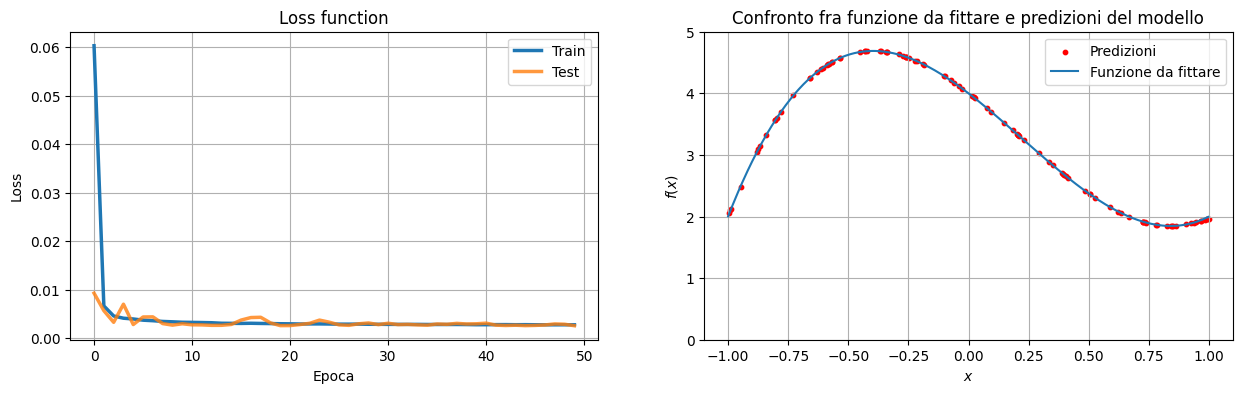

In [38]:
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d    #ideal target polynomial function

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)


# Plotto i loss values e le predizioni del modello
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],linewidth=2.5)
plt.plot(history.history['val_loss'],linewidth=2.5,alpha=0.8)
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Confronto fra funzione da fittare e predizioni del modello')
plt.scatter(x_predicted, y_predicted,color='r',label='Predizioni',s=10)
plt.plot(x_valid, y_target, label='Funzione da fittare')
plt.grid(True)
plt.ylim(-1.5,5)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 5)
plt.legend(loc='best')

plt.show()

Si osserva come la rete neurale utilizzata rappresenta un buon modello per fittare una funzione determinata da un polinomio di terzo grado.

---

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

---

In [39]:
# Genero il training set e il validation set
np.random.seed(0)
x_train = np.zeros((10000,2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 10000)

x_valid = np.zeros((1000,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1000)

# Funzione da fittare
z_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2)

sigma = 0.01
z_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In questo caso si utilizza una rete neurale con tre hidden layers e due neuroni di input, dato che la funzione da fittare è una funzione a due variabili. In questo si costruisce il primo layer con 32 neuroni con funzione di attivazione lineare, il secondo con 128 neuroni attivati da una funzione di attivazione Tanh, e il terzo con altrettanti neuroni con funzione di attivazione ReLu. Infine si ha il neurone di output.

In [40]:
model1 = tf.keras.Sequential()
model1.add(Dense(units=32, input_shape=(2,), activation='linear'))
model1.add(Dense(units=128, activation='tanh'))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=1, activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                96        
                                                                 
 dense_21 (Dense)            (None, 128)               4224      
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 20961 (81.88 KB)
Trainable params: 20961 (81.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model1.fit(x_train,z_train,batch_size=32, epochs=100,shuffle=True,validation_data=(x_valid,z_valid), verbose=0)

In [42]:
score = model1.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])

Test loss: 0.0005162731395103037


32/32 [==============================] - 0s 2ms/step


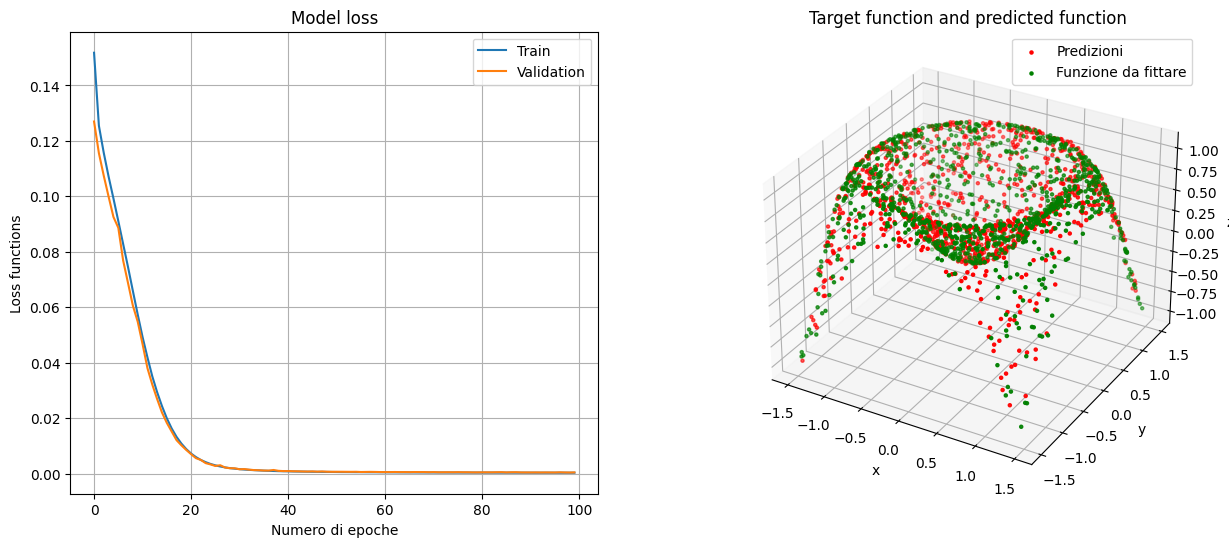

In [47]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.title.set_text('Model loss')
ax.set_xlabel('Numero di epoche')
ax.set_ylabel('Loss functions')
ax.legend(['Train', 'Validation'], loc='best')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('Confronto fra funzione da fittare e predezioni del modello')
x_pred = np.zeros((1000, 2))
x_pred [:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_pred [:,1] = np.random.uniform(-1.5, 1.5, 1000)
z_pred = model1.predict(x_pred)
ax.scatter(x_pred[:,0], x_pred[:,1], z_pred,c='r', marker='.', label='Predizioni')
ax.scatter(x_valid[:,0], x_valid[:,1], z_target, c='g', marker='.', label='Funzione da fittare')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc=0)
ax.grid(True)
plt.show()

Anche in questo caso si osserva come la rete neurale utilizzata rappresenta un buon modello per fittare la funzione a due variabili precedente.